# Learning with ChatGPT Tutor (Data Analysis & Report AI - model))

Janne Bragge || 29th of October 2024

# Data Overview: 

First, we’ll inspect the data to understand its structure and identify the features and target variable.

In [1]:
# Source (following):  https://www.datacamp.com/tutorial/decision-tree-classification-python

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split, GridSearchCV # Import train_test_split function and GridSearchCV for parameth tuning
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder # for parameth tuning



# Telecust1 dataset
# https://www.kaggle.com/datasets/prathamtripathi/customersegmentation
# load dataset
#customer_data = "Telecust1.csv"
customer_data = pd.read_csv("Telecust1.csv")
customer_data.head(5)


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


# Preprocessing:

Check for missing values, handle any data inconsistencies, and encode categorical variables if present.

In [2]:
# Confirm that 'customer_data' is indeed a DataFrame
print(f'type of data:\n{type(customer_data)}')

# Check if 'columns' attribute is accessible
print(f'columns:\n{customer_data.columns}')


type of data:
<class 'pandas.core.frame.DataFrame'>
columns:
Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


In [3]:
# Check for missing values and data types
missing_values = customer_data.isnull().sum()
data_types = customer_data.dtypes

# Check the distribution of the target variable 'custcat'
target_distribution = customer_data['custcat'].value_counts()

print(f'missing values:\n {missing_values}\n')
print(f'data types:\n {data_types}')
print(f'target distribution:\n {target_distribution}')





missing values:
 region     0
tenure     0
age        0
income     0
marital    0
address    0
ed         0
employ     0
retire     0
gender     0
reside     0
custcat    0
dtype: int64

data types:
 region      int64
tenure      int64
age         int64
income      int64
marital     int64
address     int64
ed          int64
employ      int64
retire      int64
gender      int64
reside      int64
custcat    object
dtype: object
target distribution:
 custcat
C    281
A    266
D    236
B    217
Name: count, dtype: int64


# Split data

- Split the Data: We’ll divide the dataset into training and testing sets to assess the model's performance.
- Train the Decision Tree Model: Set up and train a basic Decision Tree classifier.
- Evaluate the Model: Use accuracy and classification report metrics to understand model performance.

In [4]:
# Encode the target variable 'custcat' with LabelEncoder
label_encoder = LabelEncoder()
customer_data['custcat_encoded'] = label_encoder.fit_transform(customer_data['custcat'])

# Define features and target
X = customer_data.drop(columns=['custcat', 'custcat_encoded'])
y = customer_data['custcat_encoded']

# Display the mapping of classes to encoded values and the first few rows of preprocessed data
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
X.head(), y.head(), class_mapping


(   region  tenure  age  income  marital  address  ed  employ  retire  gender  \
 0       2      13   44      64        1        9   4       5       0       0   
 1       3      11   33     136        1        7   5       5       0       0   
 2       3      68   52     116        1       24   1      29       0       1   
 3       2      33   33      33        0       12   2       0       0       1   
 4       2      23   30      30        1        9   1       2       0       0   
 
    reside  
 0       2  
 1       6  
 2       2  
 3       1  
 4       4  ,
 0    0
 1    3
 2    2
 3    0
 4    2
 Name: custcat_encoded, dtype: int64,
 {'A': 0, 'B': 1, 'C': 2, 'D': 3})

# Train the Decision Tree Model

Set up and train a basic Decision Tree classifier.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)




# Evaluate the Model

Use accuracy and classification report metrics to understand model performance

In [6]:
print(f'Accuracy:\n {accuracy}\n')
print(f'Classification Report:\n {classification_rep}\n')

Accuracy:
 0.31

Classification Report:
               precision    recall  f1-score   support

           A       0.36      0.31      0.34        90
           B       0.30      0.37      0.33        59
           C       0.32      0.35      0.34        80
           D       0.24      0.21      0.22        71

    accuracy                           0.31       300
   macro avg       0.31      0.31      0.31       300
weighted avg       0.31      0.31      0.31       300




<span style="color: red;"> Suhteellisen alhainen tarkkuus ja F1-pistemäärät viittaavat siihen, että mallin suorituskykyä voidaan parantaa hienosäätämällä tai muuttamalla joitain mallin asetuksia.</span>


# Hyperparameter Tuning

Adjust parameters like max_depth, min_samples_split, and min_samples_leaf.

In [7]:
# Re-import necessary packages and reload dataset after environment restart
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


# Encode the target variable 'custcat' with LabelEncoder
label_encoder = LabelEncoder()
customer_data['custcat_encoded'] = label_encoder.fit_transform(customer_data['custcat'])

# Define features and target
X = customer_data.drop(columns=['custcat', 'custcat_encoded'])
y = customer_data['custcat_encoded']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
     'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 6))
}

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_


print("=== Parhaat Parametrit ===")
for param, value in best_params.items():
    print(f"{param}: {value}")


print(f'Accuracy:\n {best_score}')




=== Parhaat Parametrit ===
criterion: gini
max_depth: 3
min_samples_leaf: 1
min_samples_split: 2
Accuracy:
 0.3985714285714285


# Following KAMK course videos

# Preprocessing

In [8]:
# Source (following):  https://www.datacamp.com/tutorial/decision-tree-classification-python

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Telecust1 dataset
# https://www.kaggle.com/datasets/prathamtripathi/customersegmentation
col_names = columns = ['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
# load dataset
telecust = pd.read_csv("Telecust1.csv",  skiprows=[0], names=col_names)
telecust.head(3)

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C


# Training the data set

In [43]:
#split dataset in features and target variable
feature_cols = ['region','tenure', 'age', 'income', 'marital', 'ed', 'employ', 'retire', 'gender', 'reside']
X = telecust[feature_cols] # Features
y = telecust.custcat # Target variable

In [44]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [47]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [48]:
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.43333333333333335


# Visualize tree

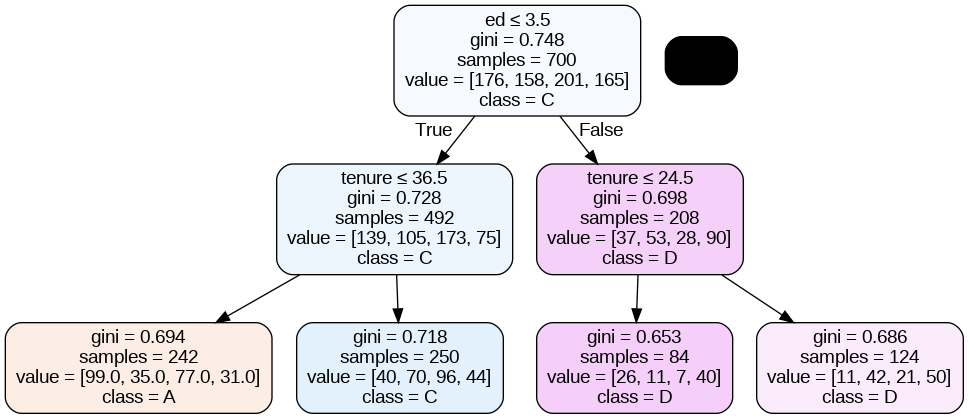

In [49]:

from sklearn.tree import export_graphviz
from io import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['A','B','C', 'D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('custcat.png')
Image(graph.create_png())

# Hyperparameter Tuning

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Oletetaan, että y_train ja y_test ovat kohdeluokkasi
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Hyperparametrien hakuverkoston määrittely
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(3, 21)),
    'min_samples_split': list(range(2, 10)),
    'min_samples_leaf': list(range(1, 6))
}

# Päätöspuu luokittelijan alustus
clf = DecisionTreeClassifier(random_state=42)

# Grid Search ja ristiinvalidointi
grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train_encoded)

# Parhaat parametrit ja arviointi testidatalla
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)

best_accuracy = accuracy_score(y_test_encoded, y_pred_best)
best_report = classification_report(y_test_encoded, y_pred_best, target_names=label_encoder.classes_)
best_params = grid_search.best_params_

# Tulostetaan tulokset siistimmin
print("=== Parhaat Parametrit ===")
for param, value in best_params.items():
    print(f"{param}: {value}")

print("\n=== Testidatan Tarkkuus ===")
print(f"Tarkkuus: {best_accuracy:.2f}")

print("\n=== Luokitteluraportti ===")
print(best_report)


=== Parhaat Parametrit ===
criterion: entropy
max_depth: 3
min_samples_leaf: 1
min_samples_split: 2

=== Testidatan Tarkkuus ===
Tarkkuus: 0.41

=== Luokitteluraportti ===
              precision    recall  f1-score   support

           A       0.41      0.67      0.51        90
           B       0.00      0.00      0.00        59
           C       0.42      0.53      0.47        80
           D       0.40      0.31      0.35        71

    accuracy                           0.41       300
   macro avg       0.31      0.38      0.33       300
weighted avg       0.33      0.41      0.36       300



/opt/conda/lib/python3.11/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [15]:
tcust = pd.read_csv("Telecust1.csv",  skiprows=[0], names=col_names)
tcust.head(3)

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C


In [16]:
#split dataset in features and target variable
feature_cols = ['region','tenure', 'age', 'income', 'marital', 'ed', 'employ', 'retire', 'gender', 'reside']
X = tcust[feature_cols] # Features
y = tcust.custcat # Target variable

In [17]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [18]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 1, min_samples_split = 2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [19]:
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.41333333333333333


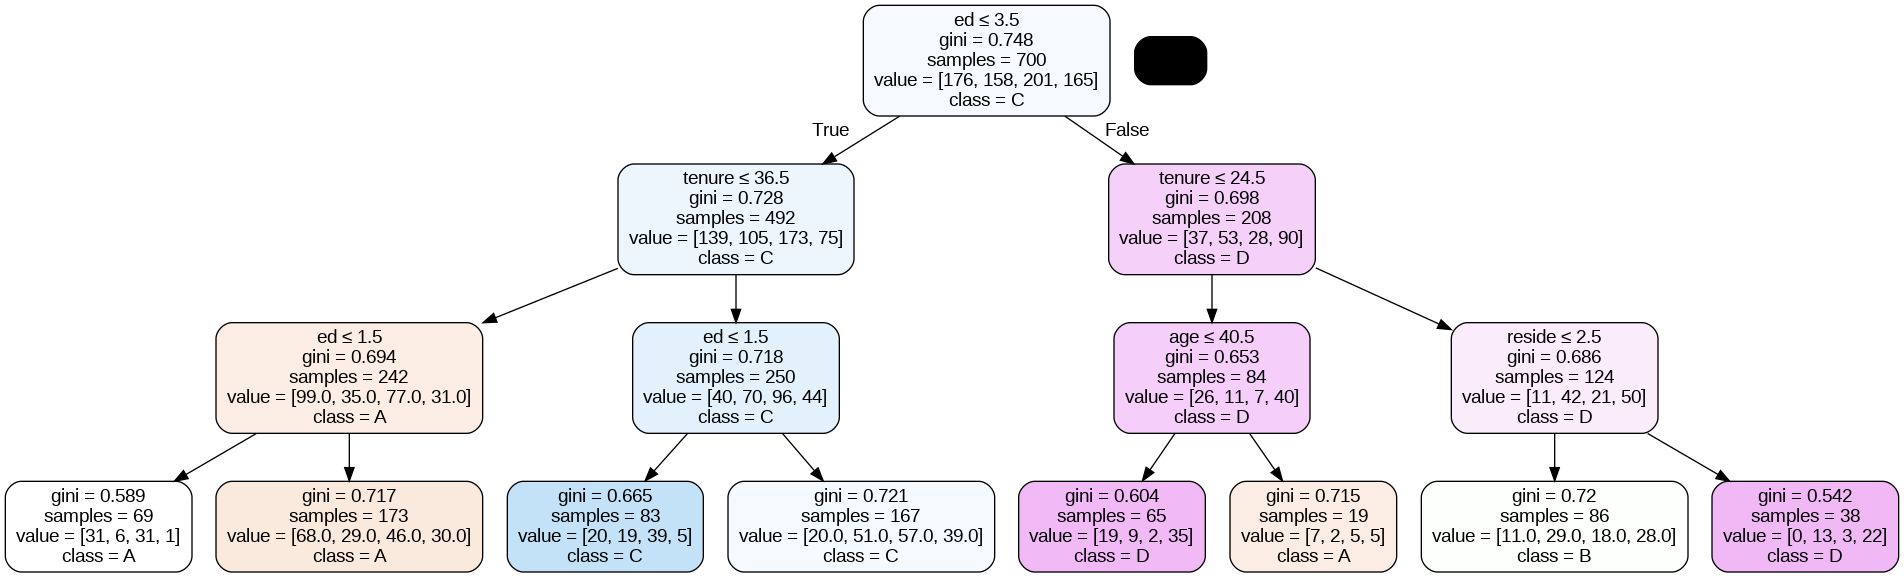

In [20]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['A','B','C', 'D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('custcat.png')
Image(graph.create_png())

<span style="color: red;"> Tarkkuus jää edelleen heikoksi kokeillaan seuraavaksi muokkaamalla muuttujien määrää.</span>


In [21]:
telecust.head(5)

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [22]:
#split dataset in features and target variable
feature_cols = ['tenure', 'age', 'income', 'employ']
X = telecust[feature_cols] # Features
y = telecust.custcat # Target variable

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth =3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
 # Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.39


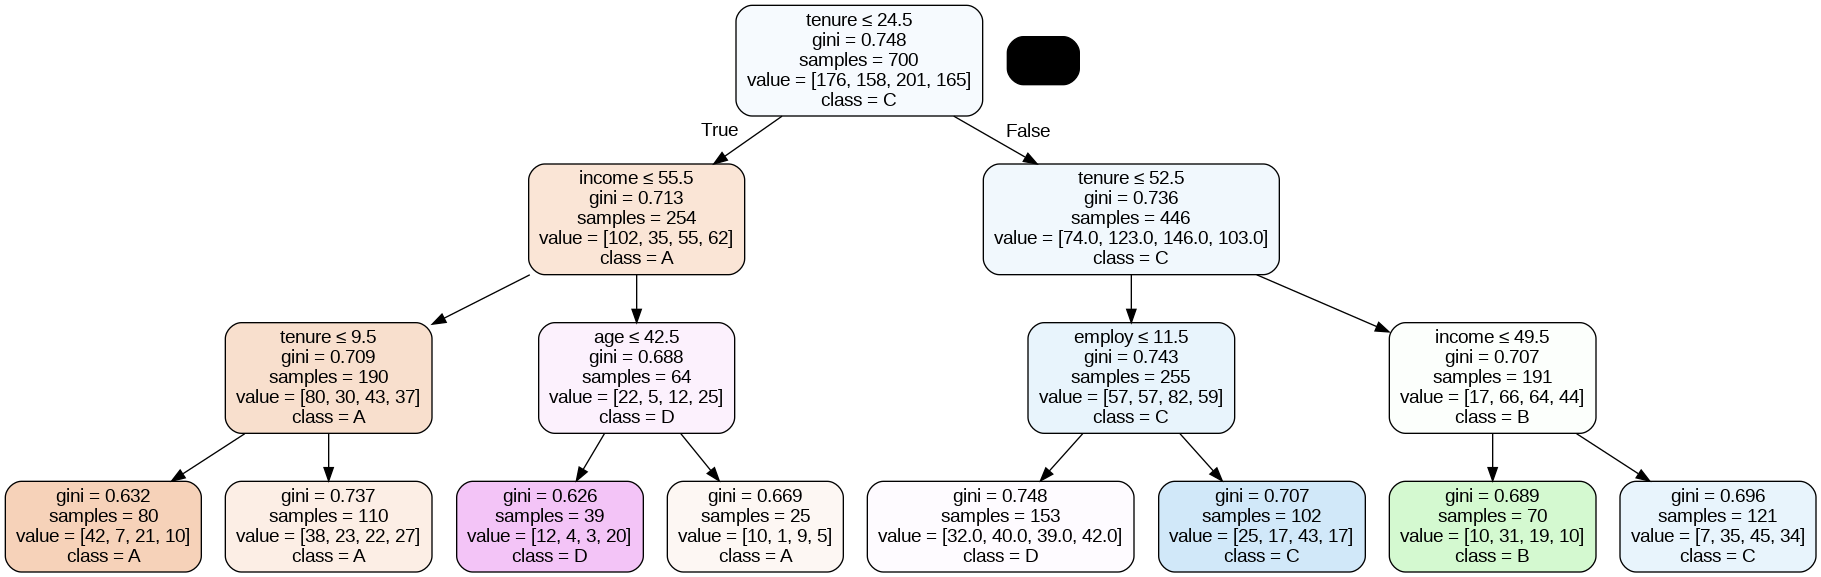

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['A','B','C', 'D'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('custcat.png')
Image(graph.create_png())

<span style="color: red;"> Edelleen jää heikoksi joten siirry seuraavaksi tutkimaan RandomForest.</span>

# Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Telecust1 dataset
# https://www.kaggle.com/datasets/prathamtripathi/customersegmentation
col_names = ['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside', 'custcat']
# load dataset
telecust_rf = pd.read_csv("Telecust1.csv",  skiprows=[0], names=col_names)
telecust_rf.head(3)


,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C


In [28]:
#split dataset in features and target variable
feature_cols_short = ['tenure', 'age', 'income', 'employ']
feature_cols_long = ['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed', 'employ', 'retire', 'gender', 'reside']
#X = telecust_rf[feature_cols_short] # Features
X = telecust_rf[feature_cols_long] # Features
y = telecust_rf.custcat # Target variable

In [29]:

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
n_estimators = 100
clf_rf = RandomForestClassifier(n_estimators=n_estimators)
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
pred_rf = clf_rf.predict(X_test)
print('accuracy:', accuracy_score(y_test, pred_rf))

accuracy: 0.36


# Evaluate the Model

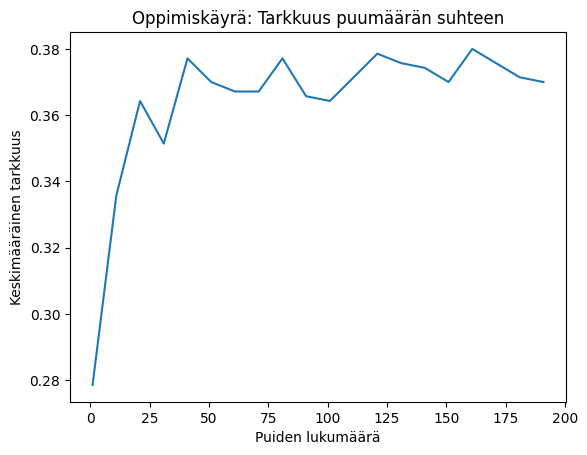

In [32]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Arvot eri puumäärille
tree_counts = range(1, 201, 10)
accuracy_scores = []

for n in tree_counts:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(scores.mean())

# Piirretään käyrä
plt.plot(tree_counts, accuracy_scores)
plt.xlabel('Puiden lukumäärä')
plt.ylabel('Keskimääräinen tarkkuus')
plt.title('Oppimiskäyrä: Tarkkuus puumäärän suhteen')
plt.show()


# GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [10, 50, 100, 150, 200, 250],  # Voit laajentaa aluetta, jos tarpeen
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Optimaaliset parametrit:", best_params)
print("Paras tarkkuus:", best_score)


Optimaaliset parametrit: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 150}
Paras tarkkuus: 0.38142857142857145


# RandomizedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(10, 301, 10),
    'max_depth': [None, 3, 6, 9],
    'min_samples_split': [2, 5, 10]
}

randomized_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train, y_train)

best_params = randomized_search.best_params_
best_score = randomized_search.best_score_

print("Optimaaliset parametrit:", best_params)
print("Paras tarkkuus:", best_score)


Optimaaliset parametrit: {'n_estimators': 230, 'min_samples_split': 5, 'max_depth': 6}
Paras tarkkuus: 0.3885714285714285


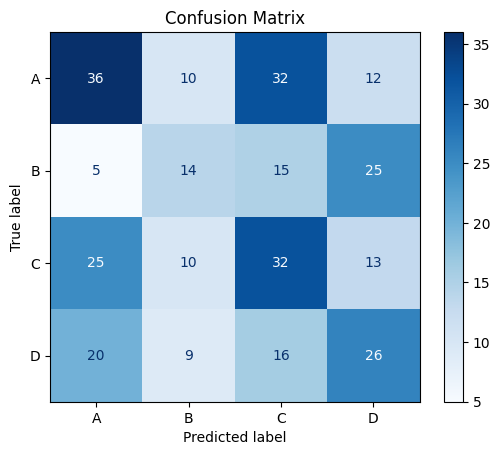

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Oletetaan, että pred_rf on mallin ennusteet ja y_test on todelliset arvot
# Luo confusion-matrix
cm = confusion_matrix(y_test, pred_rf)

# Piirretään confusion-matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)  # Jos luokkien nimet ovat käytössä
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()




### Luokka A:
- **Oikein ennustetut**: 36 (vasemmassa yläkulmassa).
- **Väärin ennustetut**: 15 luokassa B, 26 luokassa C, ja 13 luokassa D.
- Tämä tarkoittaa, että luokan A todellisista arvoista 36 oli ennustettu oikein, mutta useat oli ennustettu väärin erityisesti luokiksi C ja B.

### Luokka B:
- **Oikein ennustetut**: 15.
- **Väärin ennustetut**: 5 ennustettuina luokaksi A, 15 luokaksi C, ja 24 luokaksi D.
- Tämä osoittaa, että luokalla B on jonkin verran sekaannusta erityisesti luokkien D ja C kanssa.

### Luokka C:
- **Oikein ennustetut**: 29.
- **Väärin ennustetut**: 25 ennustettuina luokaksi A, 12 luokaksi B, ja 14 luokaksi D.
- Luokka C on useimmiten sekoitettu luokkiin A ja B, mikä saattaa viitata yhteisiin piirteisiin näiden luokkien välillä.

### Luokka D:
- **Oikein ennustetut**: 24.
- **Väärin ennustetut**: 19 luokaksi A, 13 luokaksi B, ja 15 luokaksi C.
- Luokka D on sekaantunut jonkin verran kaikkiin muihin luokkiin.

### Kokonaisarvio:
- Malli näyttää sekoittavan eri luokkia keskenään, mikä voi johtua siitä, että luokilla on joitakin päällekkäisiä piirteitä.


# Gradient Boosted Trees (XGBoost)

Accuracy: 0.35


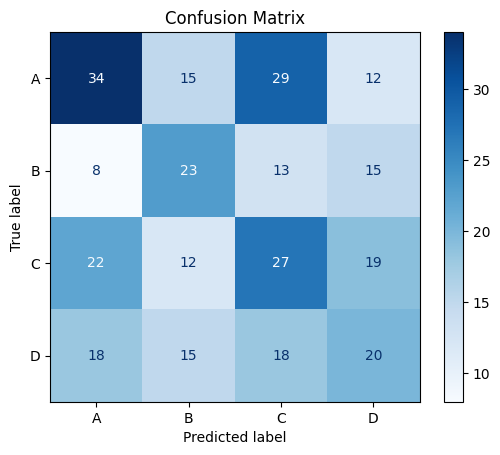

In [36]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Muunnetaan kohdeluokat numeeriseen muotoon
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Koulutetaan XGBoost-malli annetuilla arvoilla
n_data = 10000
clf_xgb = XGBClassifier()
clf_xgb.fit(X_train.iloc[:n_data, :], y_train_encoded[:n_data])

# Ennustetaan testijoukon arvot
y_pred = clf_xgb.predict(X_test)

# Lasketaan tarkkuus
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Luodaan ja piirretään confusion-matriisi
cm = confusion_matrix(y_test_encoded, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [37]:
print(classification_report(y_test, pred_rf, labels=label_encoder.classes_))

              precision    recall  f1-score   support

           A       0.42      0.40      0.41        90
           B       0.33      0.24      0.27        59
           C       0.34      0.40      0.37        80
           D       0.34      0.37      0.35        71

    accuracy                           0.36       300
   macro avg       0.36      0.35      0.35       300
weighted avg       0.36      0.36      0.36       300



In [38]:
print("Printing is done")

Printing is done
